In [2]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/Colab Notebooks/ART/ART FINAL"

#Importing python packages
import numpy as np
import pandas as pd
import os
import argparse
import time
import matplotlib.pyplot as plt


#Importing Pytorch packages
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable


#import data loader
from data_process import downSample
from models import FullyConnected
from models import RecurrentNetwork
import PlotModel

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/ART/ART FINAL'
/content/drive/My Drive/Colab Notebooks/ART/ART FINAL


In [3]:
#Importing the dataset
file_path='dataset/Phones_accelerometer.csv'
file_path1='dataset/Phones_gyroscope.csv'
file_path2='dataset/Watch_accelerometer.csv'
file_path3='dataset/Watch_gyroscope.csv'

# data = pd.read_csv(file_path)
# data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
# data3 = pd.read_csv(file_path3)

# data.fillna(0)
# data1.fillna(0)
data2.fillna(0)
# data3.fillna(0)

# dataset=data.values
# dataset1=data1.values
dataset=data2.values
# dataset3=data3.values

del data2

In [4]:
#downSampling the data since we had too much data - 1Crore samples.
#data is being downsampled to 60000, that is 10000 samples from each of the 6 classes
#calling the 'downSample' function to get 10000 samples from each class.
#so we will get 60000 total samples distributed evenly around all the 6 classes.

dataset = downSample(dataset,10000)

In [5]:
batch_size = 1000
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating shuffled data for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

dataset=dataset.astype(float)
dataset = torch.from_numpy(dataset).float()

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

# del dataset_size,indices,split,train_indices,val_indices

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
n_features=dataset.shape[1]
fnn = FullyConnected(n_features) 
train_acc,test_acc,loss,time = fnn.train(train_loader,validation_loader,0.001,100,n_features)


Train Epoch: 0 [0/60000 (0%)]	Loss: 1.794024

 Epoch 0 time take :5.400028944015503 Accuracy: 44.6125
<--------------------------------------------------------------------------------------->
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.103759

 Epoch 1 time take :5.323771715164185 Accuracy: 50.721875000000004
<--------------------------------------------------------------------------------------->
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.991327

 Epoch 2 time take :5.345120429992676 Accuracy: 54.77847222222222
<--------------------------------------------------------------------------------------->
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.848653

 Epoch 3 time take :5.289370775222778 Accuracy: 57.52708333333333
<--------------------------------------------------------------------------------------->
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.886828

 Epoch 4 time take :5.305088520050049 Accuracy: 59.55708333333334
<--------------------------------------------------------------------------------------->

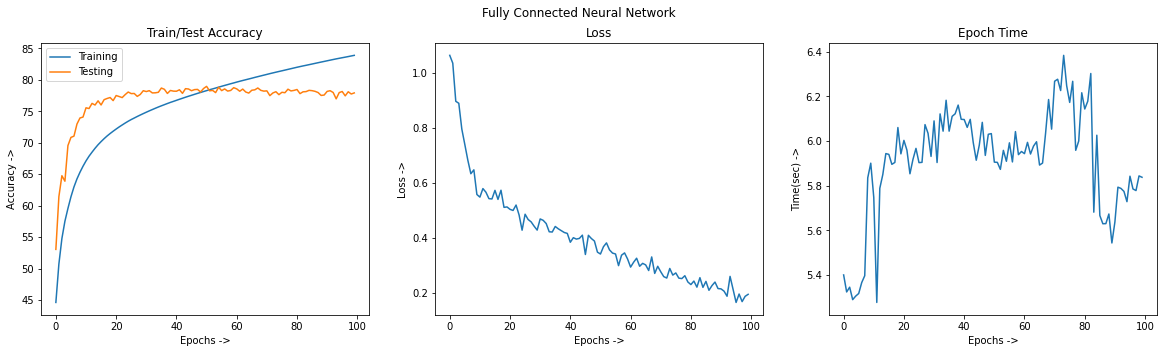

Accuracy of Fully Connected Neural Network:  77.93333333333334


In [7]:
PlotModel.plotModel(train_acc,test_acc,loss,time,'FCNN')
FNN_acc,FNN_targ,FNN_ypred = fnn.predict(validation_loader)
print("Accuracy of Fully Connected Neural Network: ",FNN_acc)

([<matplotlib.axis.YTick at 0x7fd25b5c25d0>,
 [Text(0, 0, 'bike'),
  Text(0, 0, 'sit'),
  Text(0, 0, 'st down'),
  Text(0, 0, 'st up'),
  Text(0, 0, 'stand'),
  Text(0, 0, 'walk')])

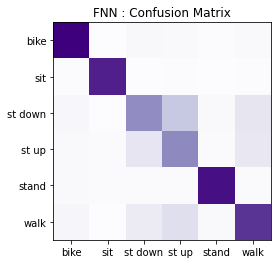

In [8]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(FNN_targ,FNN_ypred)

import matplotlib
cmap = matplotlib.cm.Purples # Can be any colormap that you want after the cm
cmap.set_bad(color='black')
plt.imshow(conf,cmap=cmap)
plt.title('FNN : Confusion Matrix')
x_lab,x_pos=plt.xticks()
y_lab,y_pos=plt.yticks()
plt.xticks((0,1,2,3,4,5),('bike','sit','st down','st up','stand','walk'))
plt.yticks((0,1,2,3,4,5),('bike','sit','st down','st up','stand','walk'))


In [9]:
rnn = RecurrentNetwork(batch_size,9,500,0.001,100)
rtrain_acc,rtest_acc,rloss,rtime = rnn.train(train_loader,validation_loader)
RNN_acc,RNN_targ,RNN_ypred = rnn.predict(validation_loader)

In Epoch: 0
Epoch:  0 | Loss: 1.3766 | Train Accuracy: 46.04
Epoch 0 time take :5.127650022506714
In Epoch: 1
Epoch:  1 | Loss: 1.1513 | Train Accuracy: 56.62
Epoch 1 time take :5.238027811050415
In Epoch: 2
Epoch:  2 | Loss: 1.0538 | Train Accuracy: 60.66
Epoch 2 time take :5.1938636302948
In Epoch: 3
Epoch:  3 | Loss: 0.9681 | Train Accuracy: 64.41
Epoch 3 time take :5.228059768676758
In Epoch: 4
Epoch:  4 | Loss: 0.8906 | Train Accuracy: 67.47
Epoch 4 time take :5.058522939682007
In Epoch: 5
Epoch:  5 | Loss: 0.8346 | Train Accuracy: 69.71
Epoch 5 time take :4.923171043395996
In Epoch: 6
Epoch:  6 | Loss: 0.7932 | Train Accuracy: 71.10
Epoch 6 time take :5.070559501647949
In Epoch: 7
Epoch:  7 | Loss: 0.7556 | Train Accuracy: 72.75
Epoch 7 time take :5.1196887493133545
In Epoch: 8
Epoch:  8 | Loss: 0.7244 | Train Accuracy: 73.78
Epoch 8 time take :5.04589056968689
In Epoch: 9
Epoch:  9 | Loss: 0.7076 | Train Accuracy: 74.12
Epoch 9 time take :5.044495582580566
In Epoch: 10
Epoch:  1

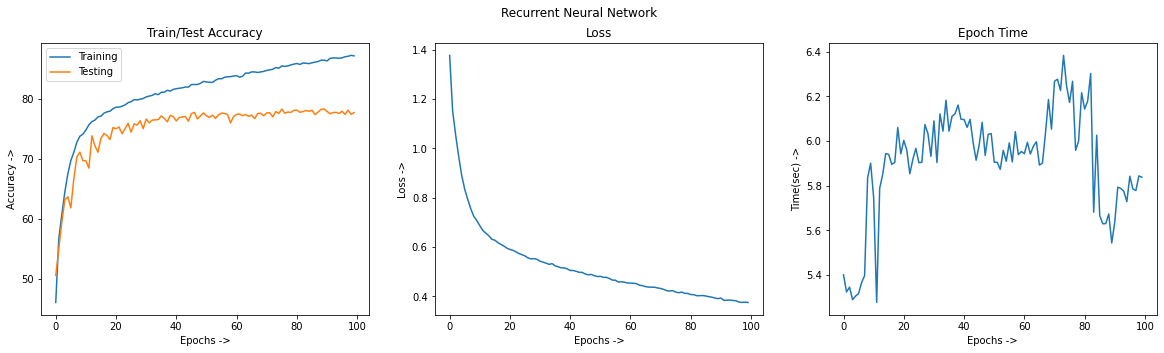

Accuracy of the Recurrent Neural Network : 77.30833333333334


In [10]:
PlotModel.plotModel(rtrain_acc,rtest_acc,rloss,time,'RNN')
print("Accuracy of the Recurrent Neural Network :",RNN_acc)

([<matplotlib.axis.YTick at 0x7fd258494290>,
 [Text(0, 0, 'bike'),
  Text(0, 0, 'sit'),
  Text(0, 0, 'st down'),
  Text(0, 0, 'st up'),
  Text(0, 0, 'stand'),
  Text(0, 0, 'walk')])

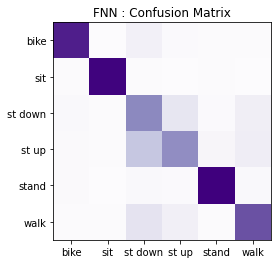

In [11]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(RNN_targ,RNN_ypred)

import matplotlib
cmap = matplotlib.cm.Purples # Can be any colormap that you want after the cm
cmap.set_bad(color='black')
plt.imshow(conf,cmap=cmap)
plt.title('FNN : Confusion Matrix')
x_lab,x_pos=plt.xticks()
y_lab,y_pos=plt.yticks()
plt.xticks((0,1,2,3,4,5),('bike','sit','st down','st up','stand','walk'))
plt.yticks((0,1,2,3,4,5),('bike','sit','st down','st up','stand','walk'))
